In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
attributes= pd.read_csv('Data/nodeattribute.csv', delimiter=';')
edgelist= pd.read_csv('Data/edgelist2.csv',delimiter=';')
g_attributes= attributes[attributes['0']=='gene']
g_attributes = g_attributes.assign(color='#F4C2C2')
d_attributes = attributes[attributes['0']=='disease']
d_attributes = d_attributes.assign(color='#7C0A02')



#We need to convert the data frame into a dictionary to use the set_node_attributes 
nodes_attr = attributes.set_index('Id').to_dict(orient='index')
g_nodes_attr = g_attributes.set_index('Id').to_dict(orient='index')
d_nodes_attr= d_attributes.set_index('Id').to_dict(orient='index')

g_nodes= g_attributes['Id'].to_list()
d_nodes=d_attributes['Id'].to_list()
edges= edgelist.values.tolist()


G = nx.Graph()
G.add_nodes_from(g_nodes, bipartite=0)
G.add_nodes_from(d_nodes, bipartite=1 )
nx.set_node_attributes(G, nodes_attr)
G.add_edges_from(edges)


In [37]:
print(nx.info(G))

Graph with 1419 nodes and 2738 edges


In [7]:
#global clustering coefficient
print(nx.transitivity(G))

#average clustering coefficient
print(nx.average_clustering(G))

#local clustering coefficient
#print(nx.clustering(G))

0.2509545296771954
0.48806215597210756


In [8]:
sns.set_style('whitegrid')

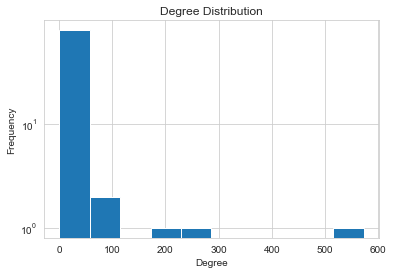

In [12]:
histogram = nx.degree_histogram(G)
fig, ax = plt.subplots()
plt.yscale('log')
ax.hist(histogram);
ax.set_xlabel('Degree');
ax.set_ylabel('Frequency');
ax.set_title('Degree Distribution');

In [34]:
'''degree_freq = nx.degree_histogram(G)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
degree_range = range(len(degree_freq))

ax.loglog(degree_range, degree_freq,'-');
sns.lineplot();
ax.set_xlabel('Degree');
ax.set_ylabel('Frequency');
'''


'degree_freq = nx.degree_histogram(G)\nsns.set_theme(style="whitegrid")\n\nfig, ax = plt.subplots(figsize=(10, 6))\ndegree_range = range(len(degree_freq))\n\nax.loglog(degree_range, degree_freq,\'-\');\nsns.lineplot();\nax.set_xlabel(\'Degree\');\nax.set_ylabel(\'Frequency\');\n'

In [32]:
degree_freq = [x/sum(degree_freq) for x in degree_freq]
#print(degree_freq)

def plot_inverse_cdf(degree_freq):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    deg = [0]*len(degree_freq)
    sum_of_all = sum(degree_freq)
    for i in range(len(deg)):
        for j in range(i,len(deg)):
            deg[i] += degree_freq[j]
        deg[i] = deg[i]/sum_of_all
    
    ax.loglog(degree_range, deg)

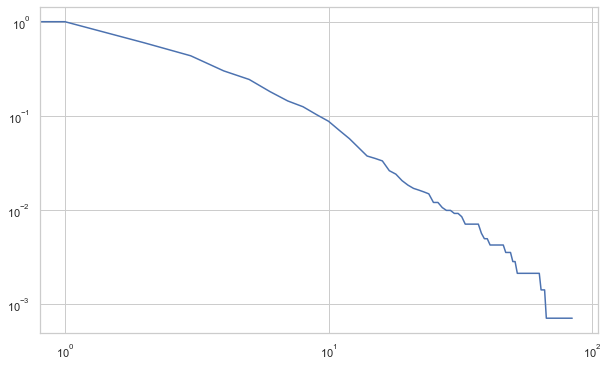

In [33]:
plot_inverse_cdf()